In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
import os
import glob
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# $ qq\to t \bar{t}$, $|\mathcal{M}_{qq\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [7]:
files_qq = list(glob.glob('/home/vinicius/EFT_ToyModel/xsec_processFolders/xsecs/SpinFlip/*qq*.txt'))
pts_q_eft = []
err_q_eft = []
pts_q_uv = []
err_q_uv = []
m_ST = []
m_Chi = []
for f in files_qq:
    data = np.loadtxt(f, delimiter=',', comments='#')
    for row in data:
        if 'uv_1_loop' in f:
            pts_q_uv.append(row[2])
            err_q_uv.append(row[3])
        else:
            pts_q_eft.append(row[2])
            err_q_eft.append(row[3])
            m_ST.append(row[0])
            m_Chi.append(row[1])
            
pts_q_eft = np.array(pts_q_eft)
err_q_eft = np.array(err_q_eft)
pts_q_uv = np.array(pts_q_uv)
err_q_uv = np.array(err_q_uv)
m_ST = np.array(m_ST)/1000.0
m_Chi = np.array(m_Chi)/1000.0

print(pts_q_uv, m_ST)

[ 6.585e-02  7.216e-02  7.041e-02  6.754e-02  6.278e-02  5.293e-02
  3.732e-02  1.991e-02  1.180e-02  7.909e-03  5.492e-03  4.017e-03
  3.091e-03  2.479e-03  1.845e-03  1.560e-03  1.305e-03  1.065e-03
  5.825e-04  3.689e-04  2.564e-04  1.423e-04  9.117e-05  6.328e-05
  4.647e-05  3.558e-05  2.811e-05  2.277e-05  5.684e-06  2.548e-06
  1.434e-06  9.620e-07  9.076e-07  4.834e-07  6.909e-07 -5.447e-07
  1.157e-06] [  0.175   0.19    0.2     0.21    0.225   0.25    0.3     0.4     0.5
   0.6     0.7     0.8     0.9     1.      1.15    1.25    1.35    1.5
   2.      2.5     3.      4.      5.      6.      7.      8.      9.
  10.     20.     30.     40.     50.     60.     70.     80.     90.
 100.   ]


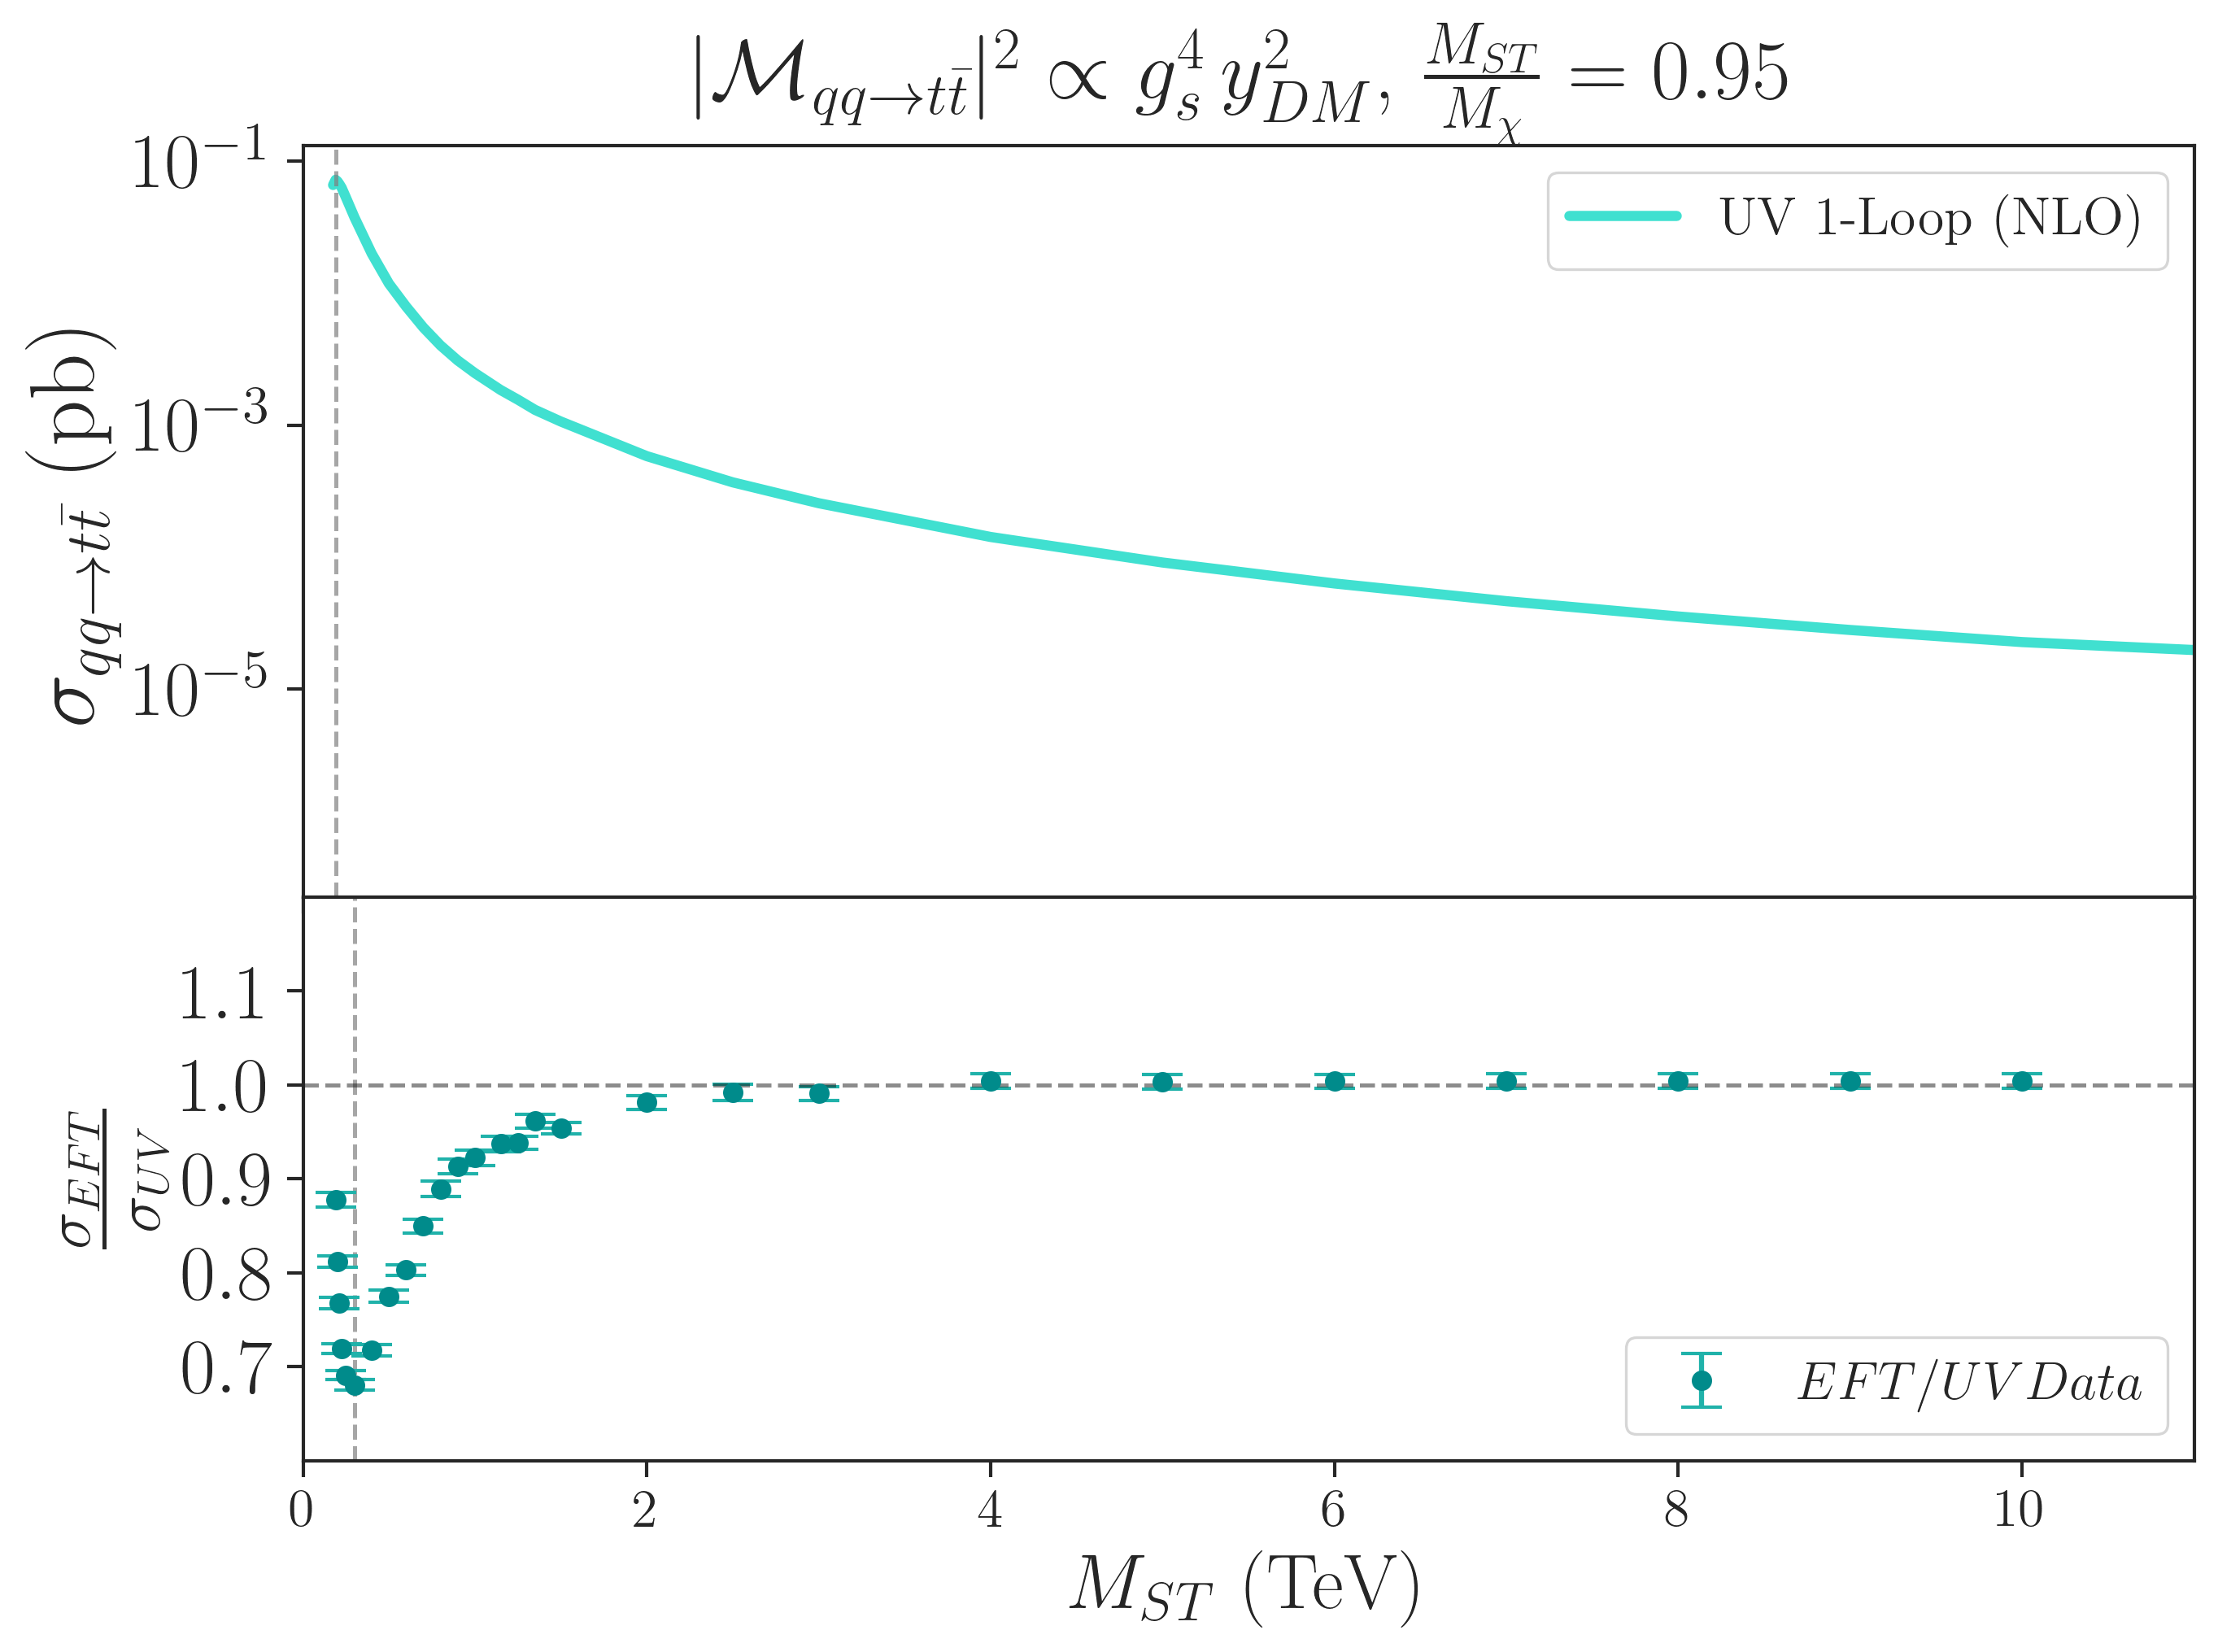

In [13]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
#axs[0].errorbar(m_ST,pts_q_eft,yerr = err_q_eft, fmt ='o', ms = 3.0, capsize=3, 
 #               color = 'royalblue', label = 'EFT' )
axs[0].plot(m_ST,pts_q_uv, lw = 3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)')

axs[0].set_ylabel(r'$\sigma_{qq\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{qq\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_{ST}}{M_\chi} = 0.95$ ', fontsize = 25)
axs[0].set_yscale('log')
axs[0].axvline(x=0.19, color='gray', linestyle='--', alpha=0.7 )
axs[1].axvline(x=0.3, color='gray', linestyle='--', alpha=0.7 )
axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff = (pts_q_eft )/pts_q_uv
err = abs(diff)*np.sqrt((err_q_uv/pts_q_uv)**2 + (err_q_eft/pts_q_eft)**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_ST[1:], diff[1:], yerr=err[1:],
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkcyan',         # Marker face color
                ecolor='lightseagreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6,                # Size of the caps
                capthick=1, label = '$EFT/UV Data$')               # Thickness of the caps
axs[1].axhline(y=1, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27.0)
axs[1].set_ylim([0.6,1.2])
#axs[1].set_xlim([10,110])
axs[1].set_xlim([0,11])
axs[1].set_yticks(np.arange(0.7, 1.2,0.1))
axs[1].legend(loc = 'lower right')

#axs[1].set_yscale('log')

plt.xlabel(r'$M_{ST}$ (TeV)', fontsize= 23.0)
#plt.xticks(np.arange(0,11,1), fontsize = 23.0)
plt.yticks(fontsize = 23)
#plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/qq2ttbar_CS.png')
plt.show()

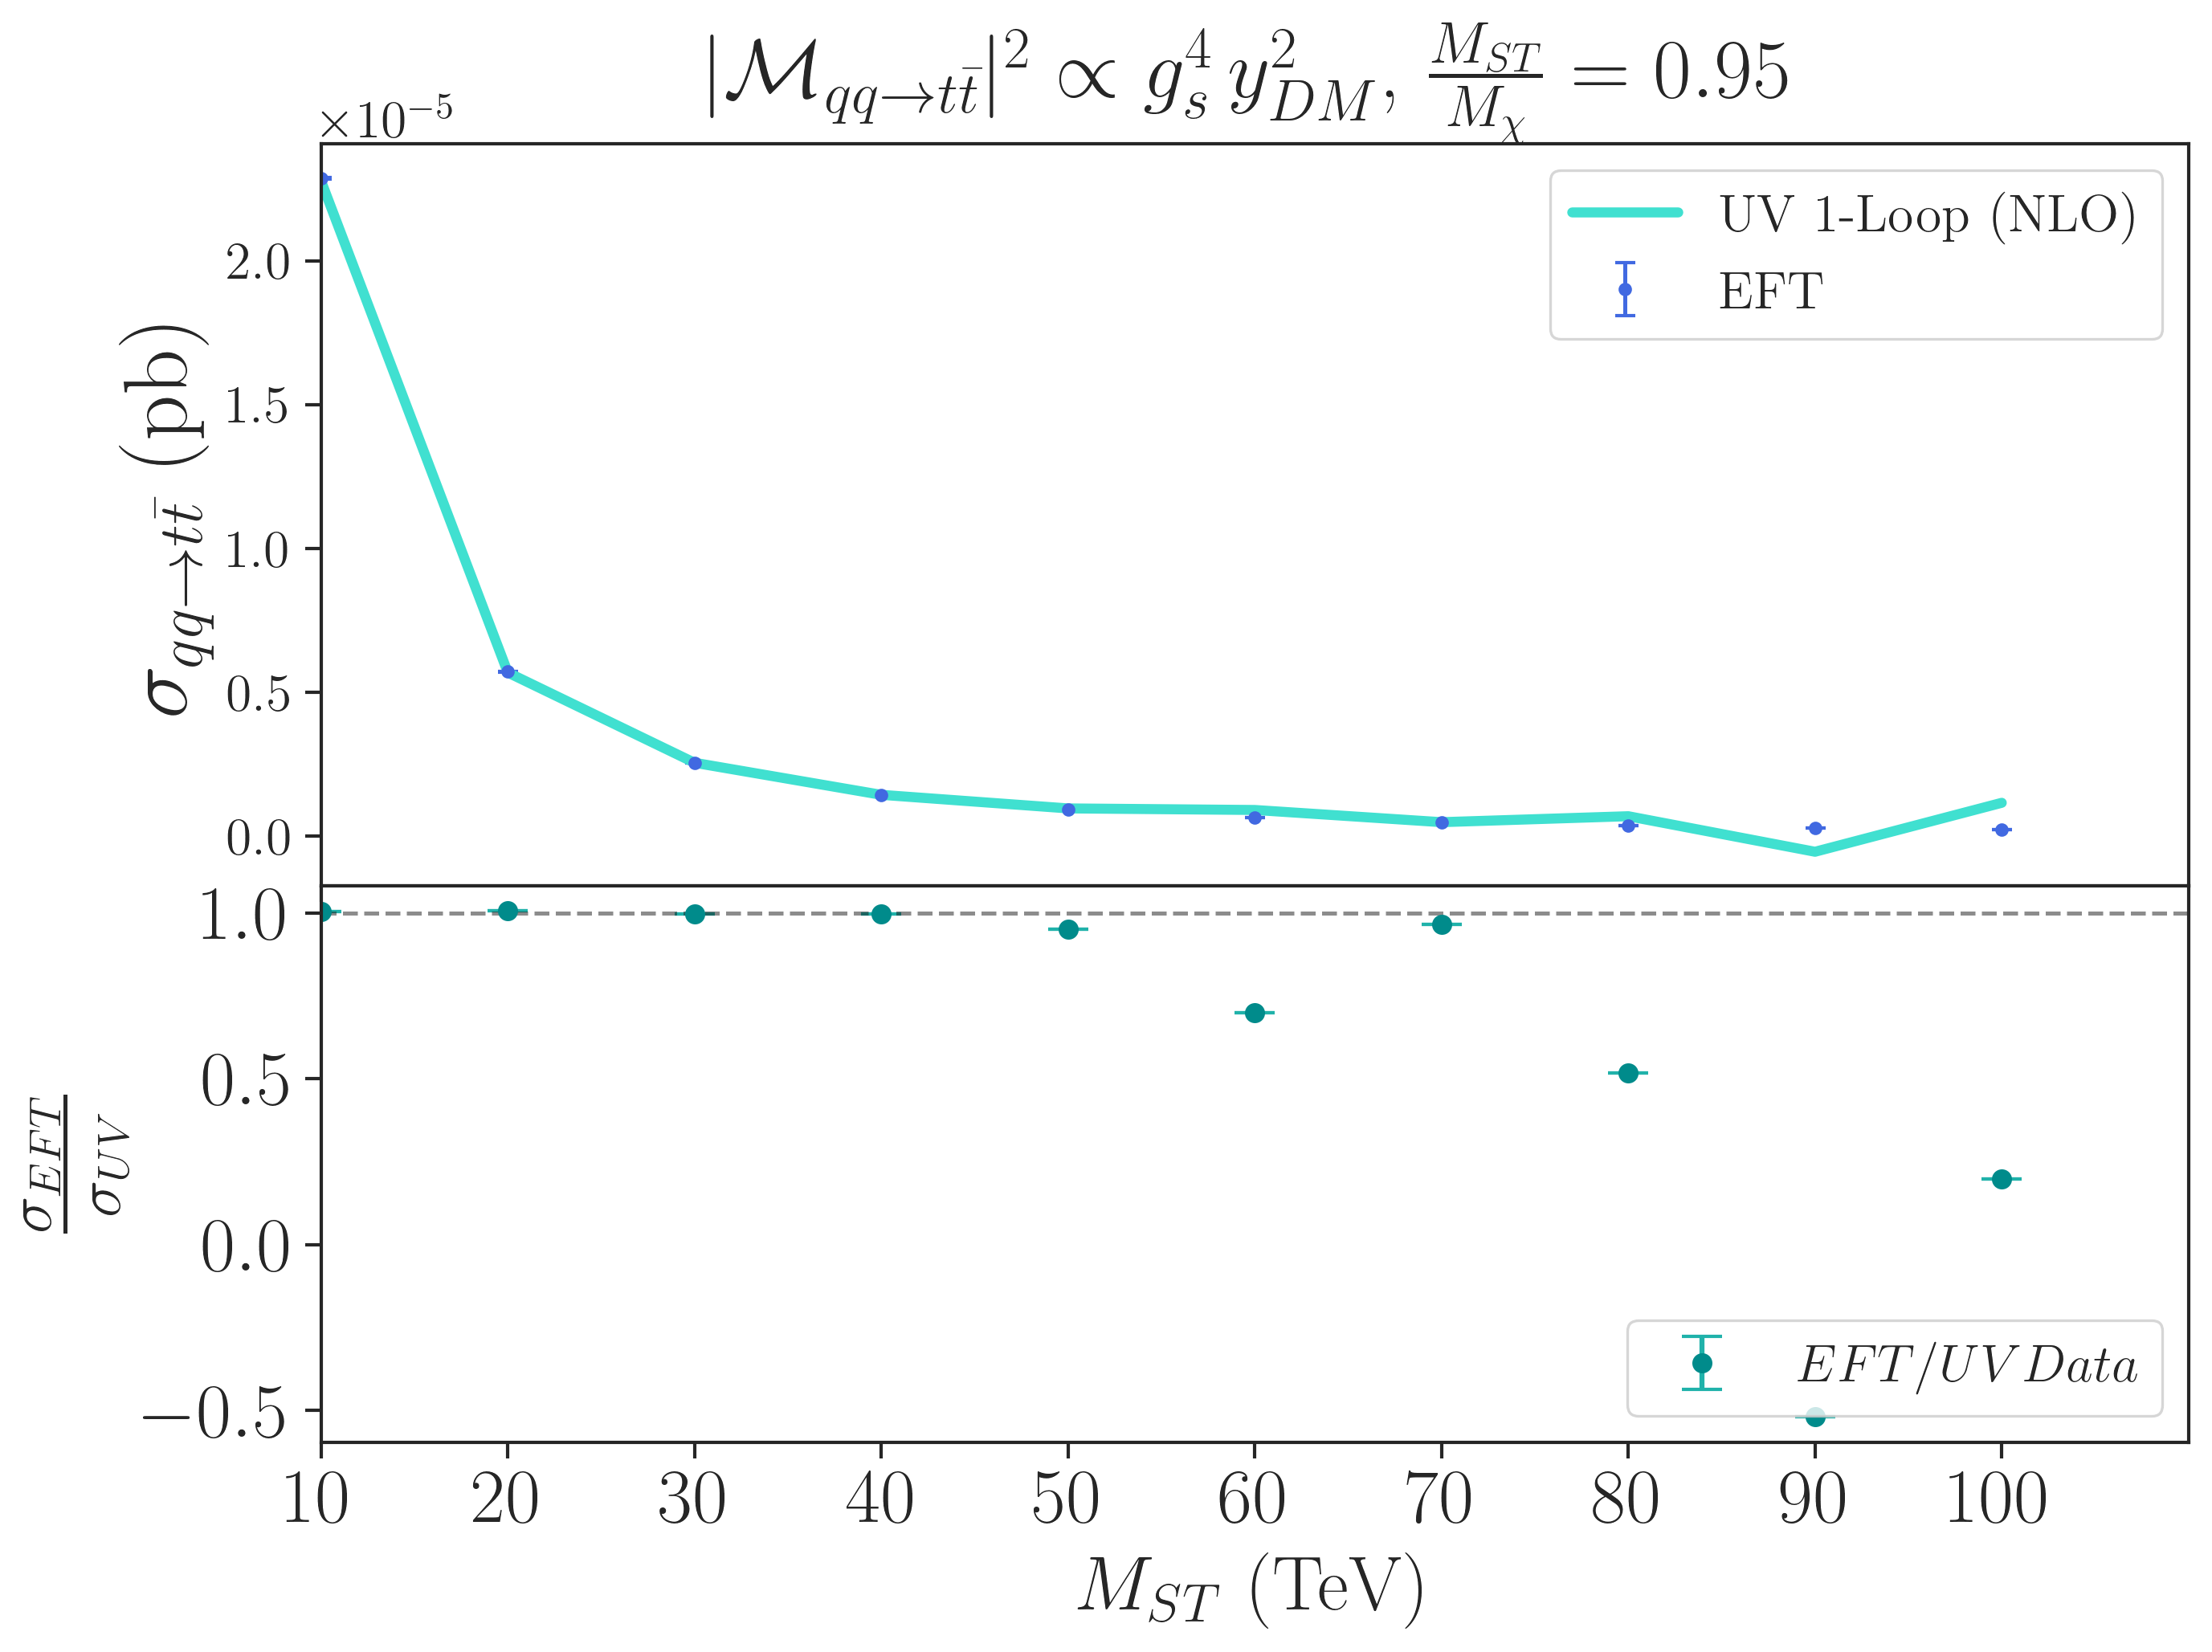

In [64]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_ST[27:],pts_q_eft[27:],yerr = err_q_eft[27:], fmt ='o', ms = 3.0, capsize=3, 
                color = 'royalblue', label = 'EFT' )
axs[0].plot(m_ST[27:],pts_q_uv[27:], lw = 3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)')

axs[0].set_ylabel(r'$\sigma_{qq\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{qq\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_{ST}}{M_\chi} = 0.95$ ', fontsize = 25)
#axs[0].set_yscale('log')
#axs[0].set_ylim([1e-8,1e-3])
#axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff = (pts_q_eft[27:] )/pts_q_uv[27:]
err = np.sqrt(pts_q_eft[27:]*(err_q_uv[27:]/pts_q_uv[27:])**2 + (1/pts_q_uv[27:]) * err_q_eft[27:]**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_ST[27:], diff, yerr=err,
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkcyan',         # Marker face color
                ecolor='lightseagreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6,                # Size of the caps
                capthick=1, label = '$EFT/UV Data$')               # Thickness of the caps
axs[1].axhline(y=1, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27.0)
#axs[1].set_ylim([0.6,1.2])
axs[1].set_xlim([10,110])
#axs[1].set_yticks(np.arange(0.7, 1.2,0.1))
axs[1].legend(loc = 'lower right')

#axs[1].set_yscale('log')

plt.xlabel(r'$M_{ST}$ (TeV)', fontsize= 23.0)
plt.xticks(np.arange(10,110,10), fontsize = 23.0)
plt.yticks(fontsize = 23)
#plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/qq2ttbar_CS.png')
plt.show()

# $ g g\to t \bar{t}$, $|\mathcal{M}_{gg\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [72]:
files_gg = list(glob.glob('/home/vinicius/EFT_ToyModel/xsec_processFolders/xsecs/SpinFlip/*gg*.txt'))
pts_g_eft = []
err_g_eft = []
pts_g_uv = []
err_g_uv = []
m_ST1 = []
m_Chi1 = []
for f in files_gg:
    data = np.loadtxt(f, delimiter=',', comments='#')
    for row in data:
        if 'uv_1_loop' in f:
            pts_g_uv.append(row[2])
            err_g_uv.append(row[3])
        else:
            pts_g_eft.append(row[2])
            err_g_eft.append(row[3])
            m_ST1.append(row[0])
            m_Chi1.append(row[1])
            
pts_g_eft = np.array(pts_g_eft)
err_g_eft = np.array(err_g_eft)
pts_g_uv = np.array(pts_g_uv)
err_g_uv = np.array(err_g_uv)
m_ST1 = np.array(m_ST1)/1000.0
m_Chi1 = np.array(m_Chi1)/1000.0

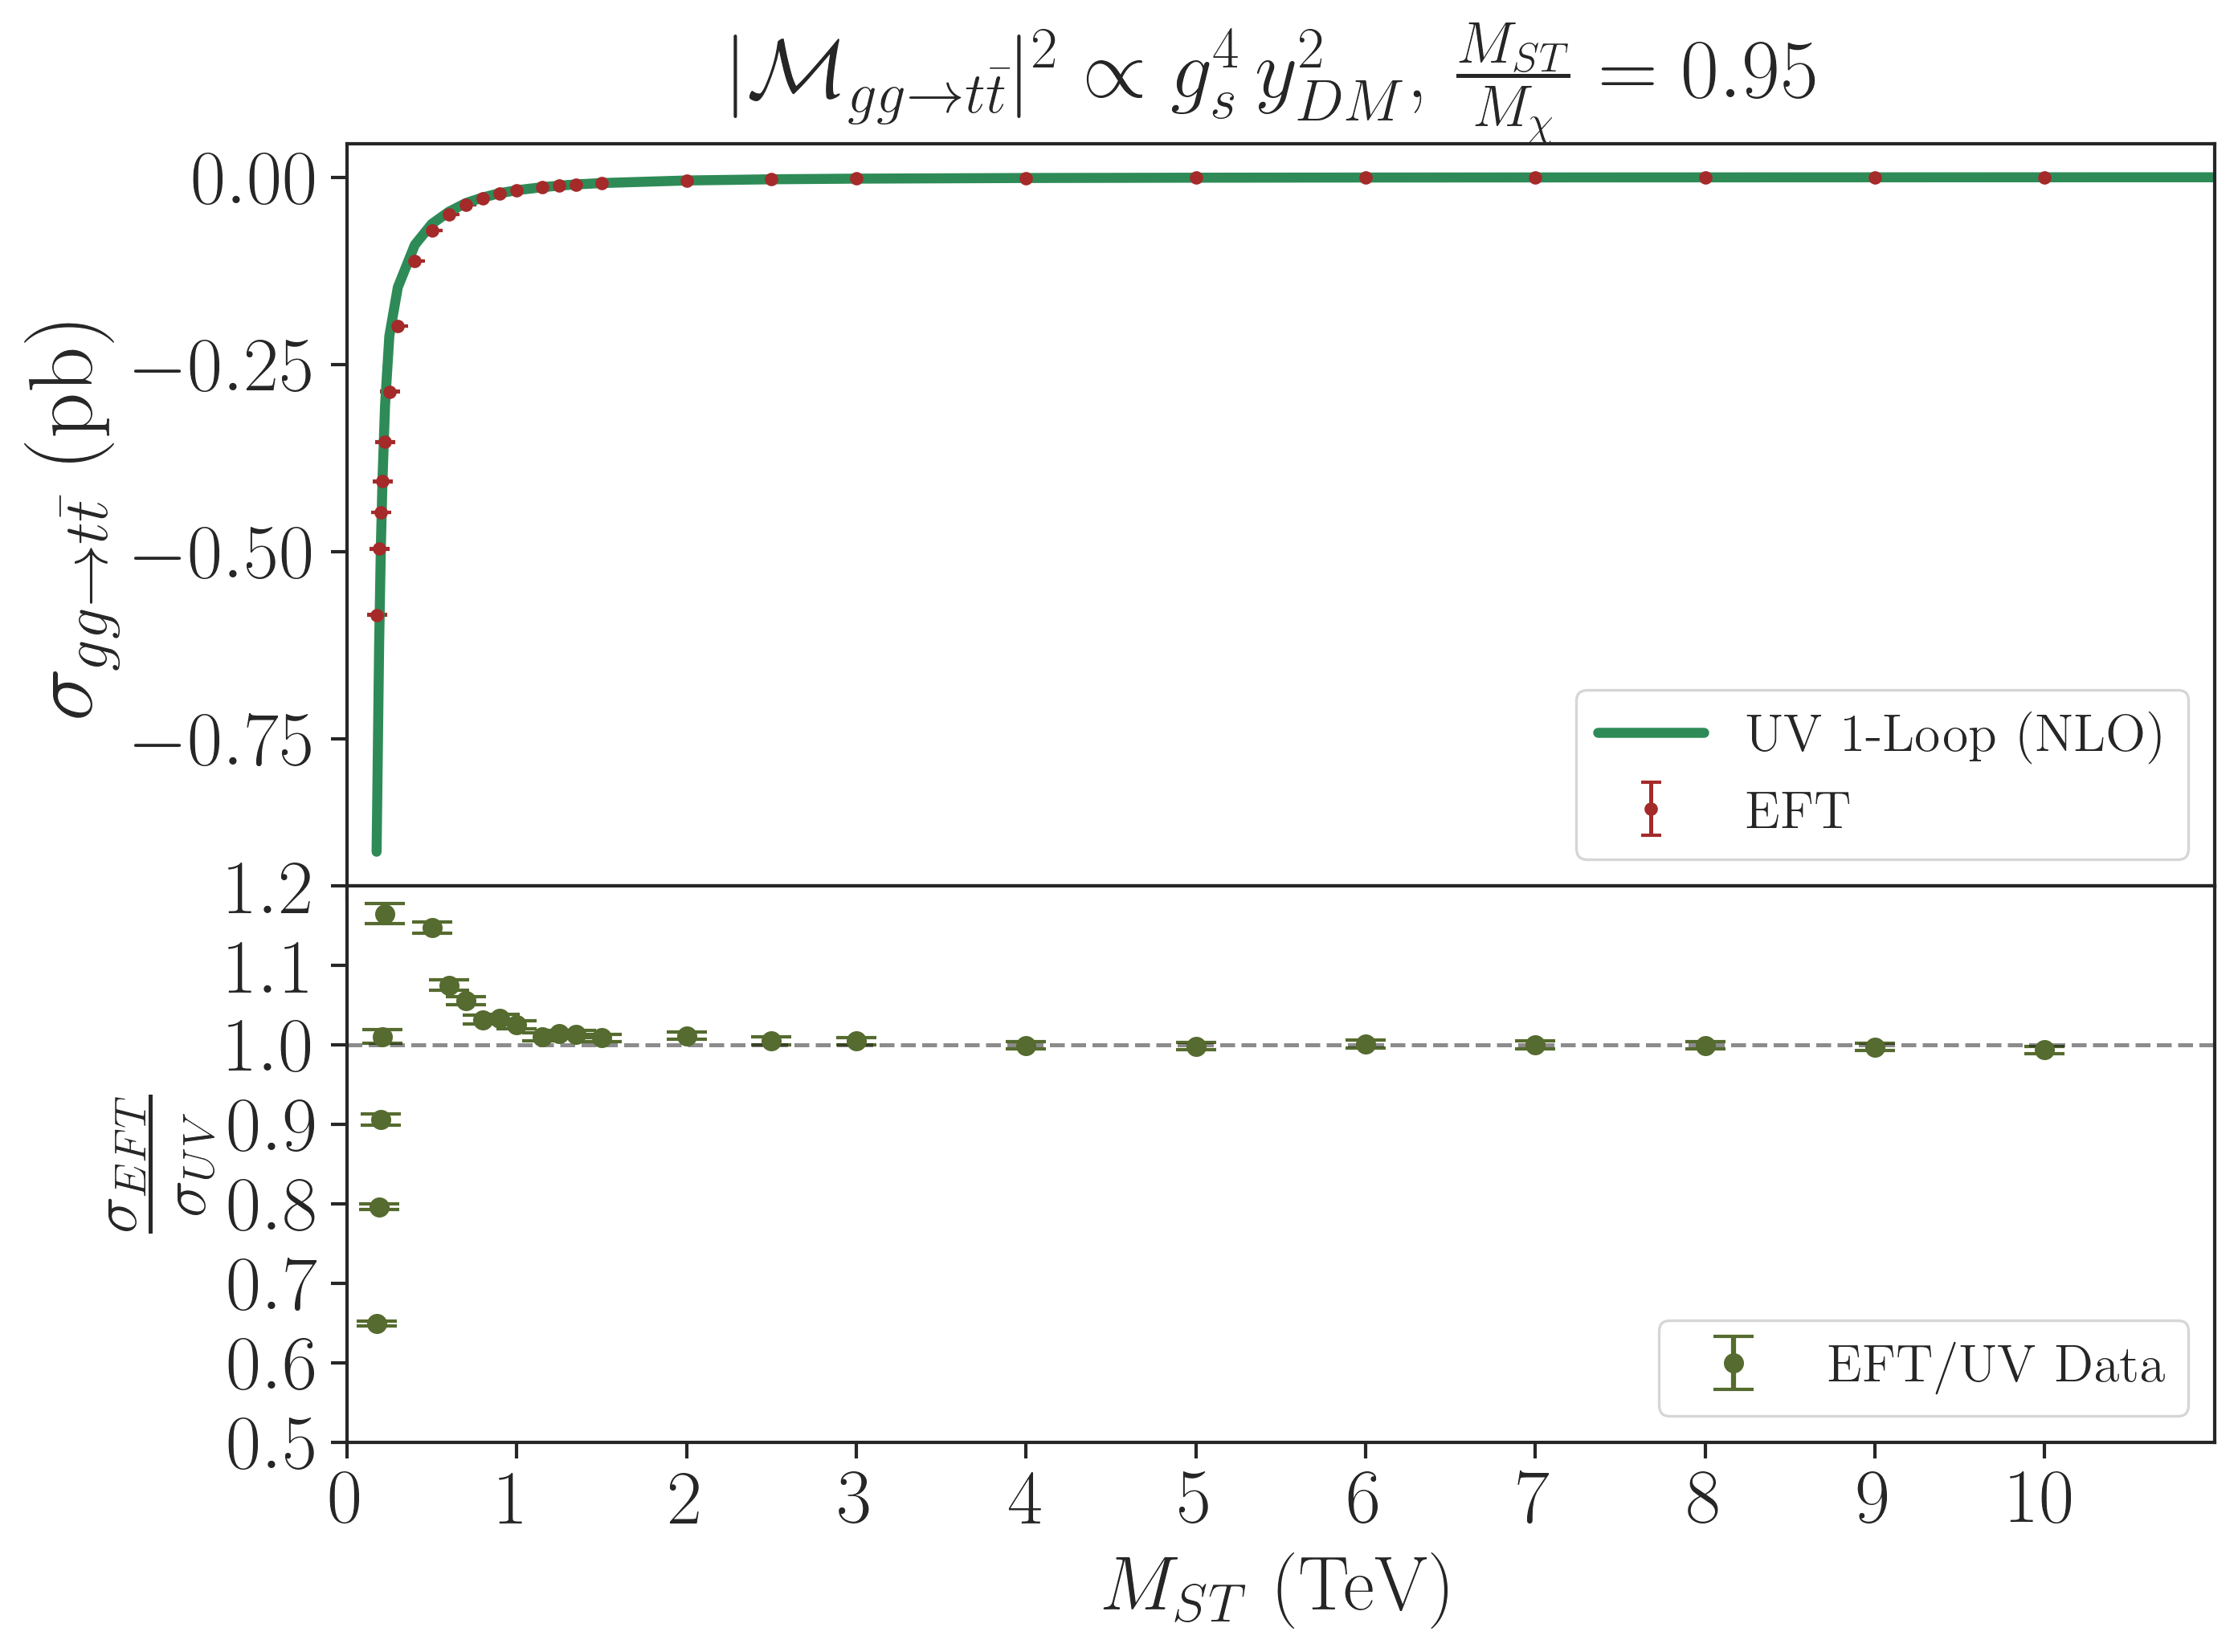

In [76]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_ST1,pts_g_eft,yerr = err_g_eft,fmt = 'o', ms = 3.0, capsize=3, 
                color = 'brown', label = 'EFT' )
#axs[0].errorbar(m_psiT3,pts_g_uv,err_g_uv,0, 'o', ms = 3.0, capsize=3, 
 #               color = 'seagreen', label = 'UV 1-Loop (NLO)' )
axs[0].plot(m_ST1,pts_g_uv, lw = 3.0, 
                color = 'seagreen' , label = 'UV 1-Loop (NLO)')
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{gg\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_{ST}}{M_\chi} = 0.95$  ', fontsize = 25)
#axs[0].set_yscale('log')
axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff1 = (pts_g_eft )/pts_g_uv
err1 = abs(diff1)*np.sqrt((err_g_uv/pts_g_uv)**2 + (err_g_eft/pts_g_eft)**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_ST1, diff1, yerr=err1,
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkolivegreen',         # Marker face color
                ecolor='darkolivegreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6, label = 'EFT/UV Data')              # Size of the caps

#axs[1].plot(m_psiT3,diff1,
 #               color = 'palegreen', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=1.0, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27)
axs[1].set_ylim([0.6,1.2])
#axs[1].set_xlim([10,110])
axs[1].set_xlim([0,11])
axs[1].set_yticks(np.arange(0.5, 1.3,0.1))
axs[1].legend(loc = 'lower right')

#axs[1].set_yscale('log')


plt.xlabel(r'$M_{ST}$ (TeV)', fontsize= 23.0)
plt.xticks(np.arange(0,11,1), fontsize = 23.0)
plt.yticks(fontsize = 23)
#plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/gg2ttbar_CS.png')
plt.show()

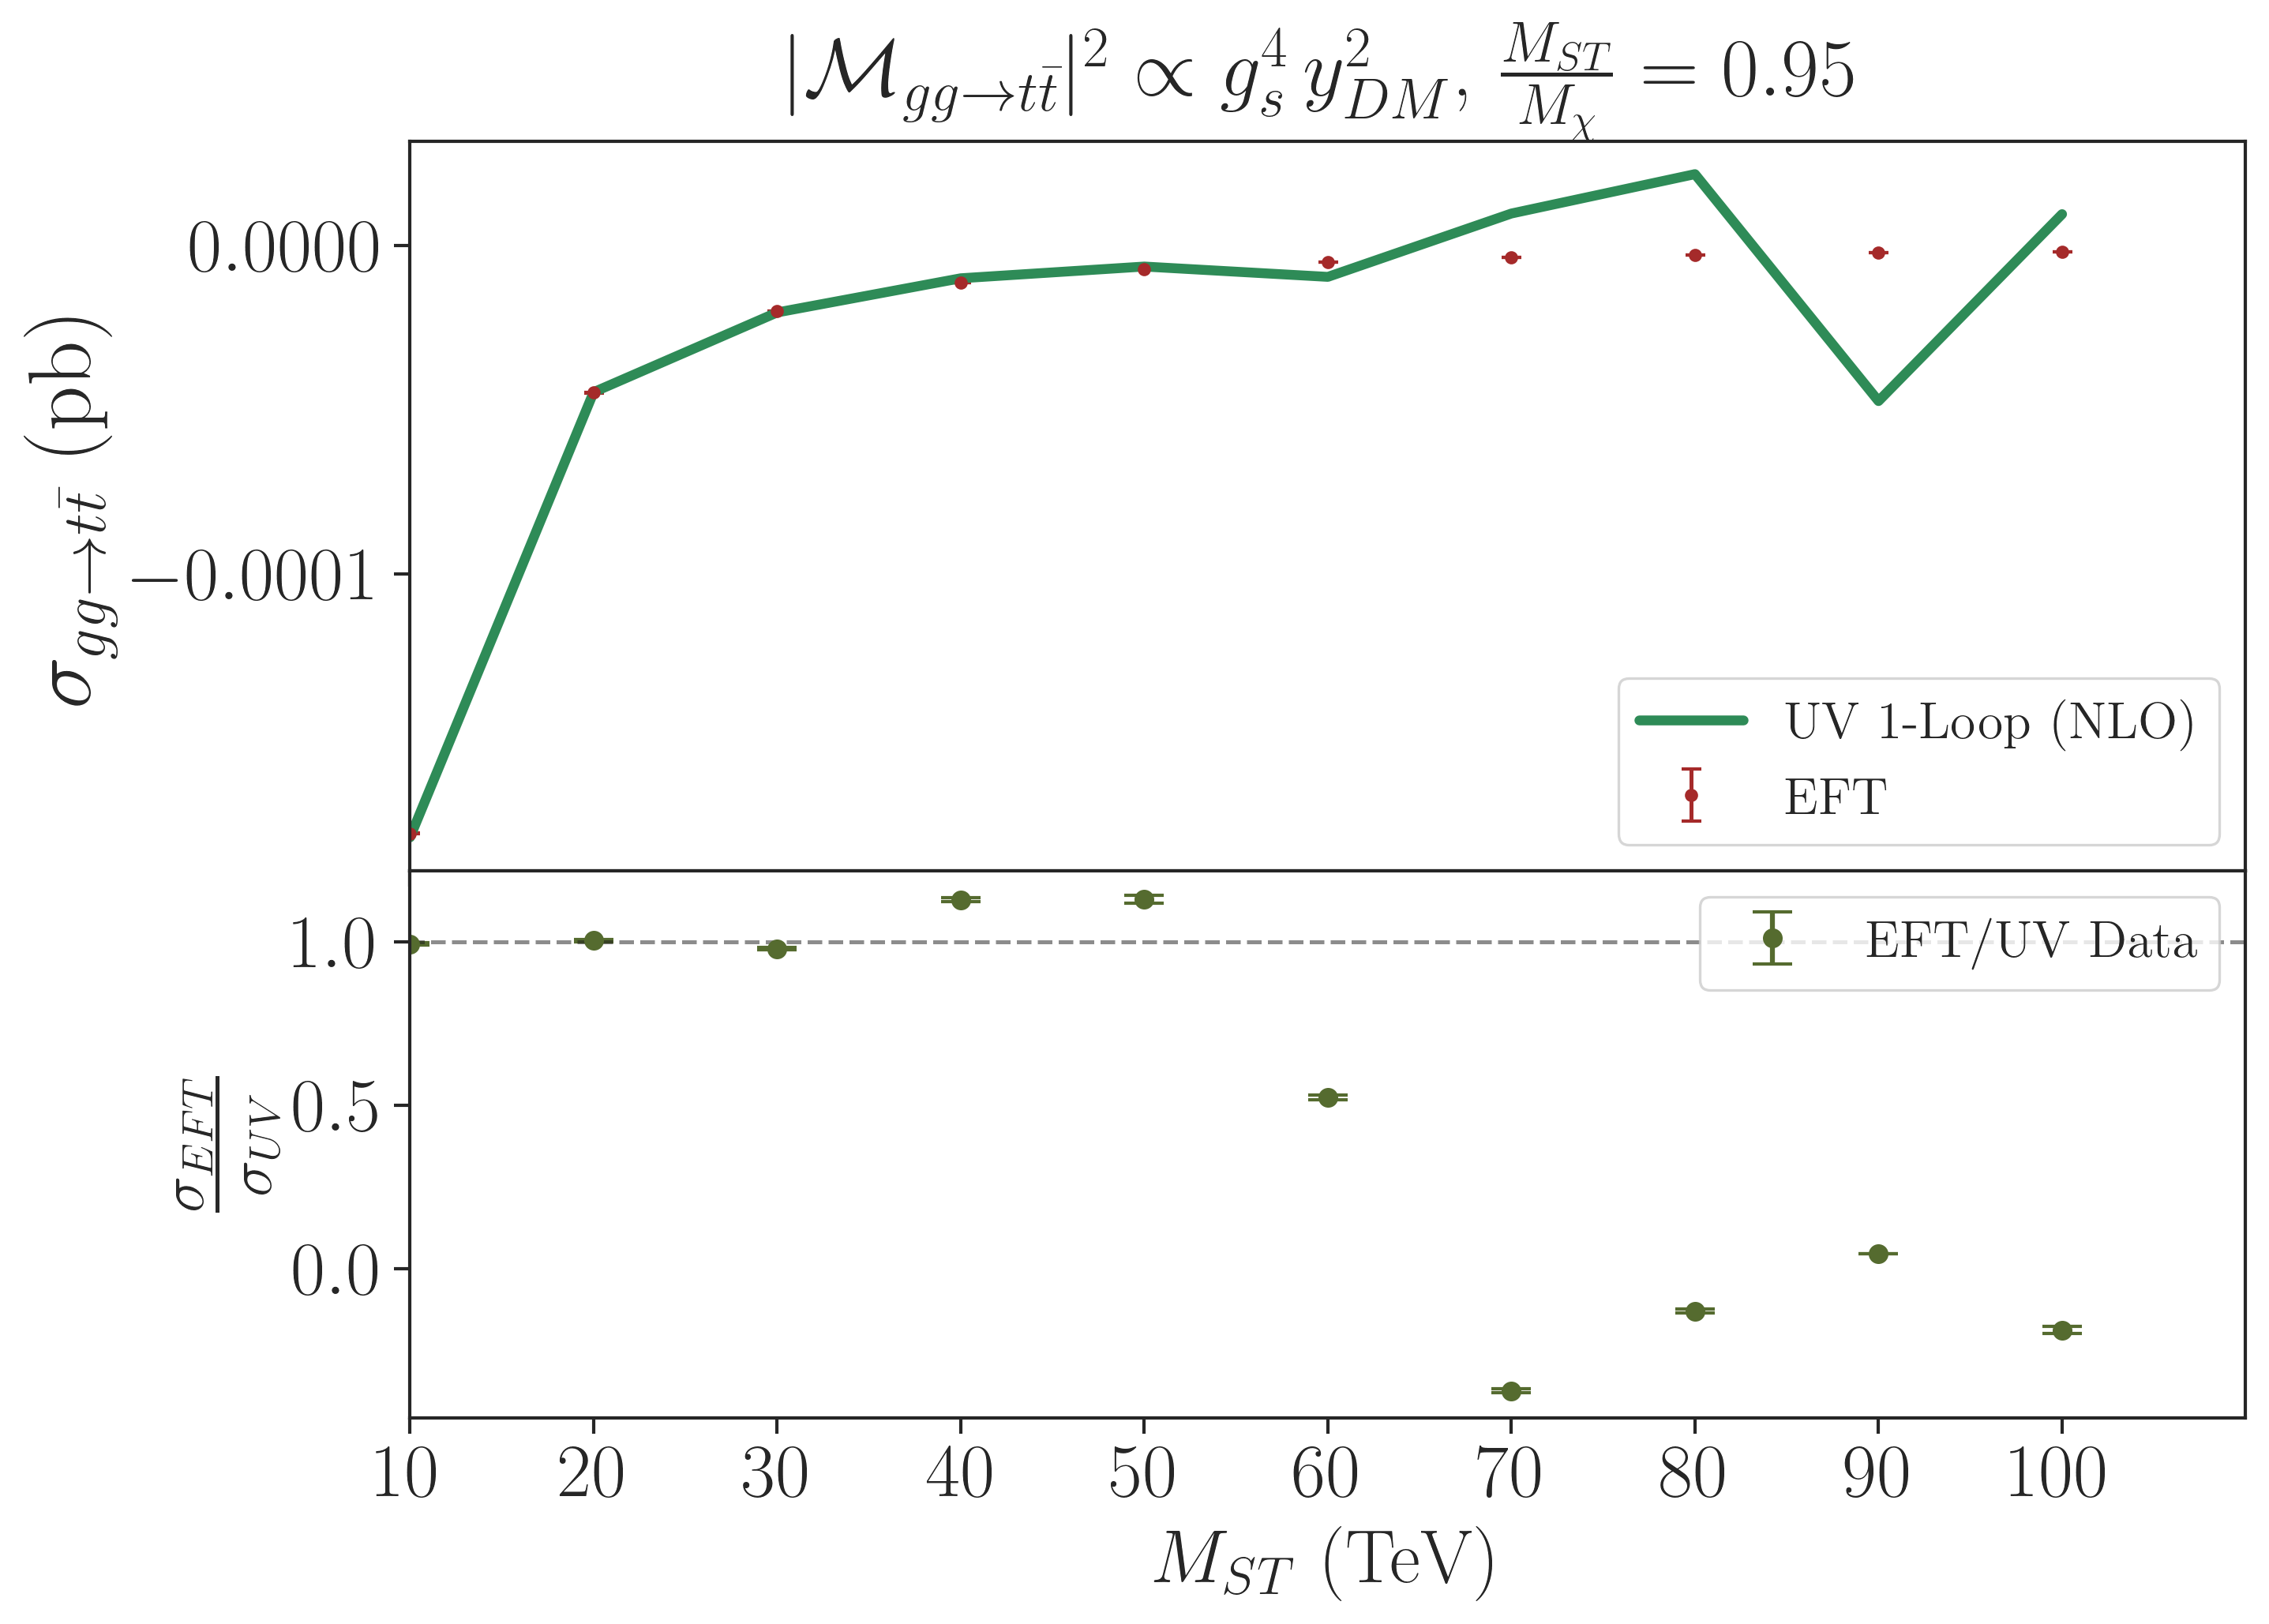

In [82]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 6])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_ST1[27:],pts_g_eft[27:],yerr = err_g_eft[27:],fmt = 'o', ms = 3.0, capsize=3, 
                color = 'brown', label = 'EFT' )
#axs[0].errorbar(m_psiT3,pts_g_uv,err_g_uv,0, 'o', ms = 3.0, capsize=3, 
 #               color = 'seagreen', label = 'UV 1-Loop (NLO)' )
axs[0].plot(m_ST1[27:],pts_g_uv[27:], lw = 3.0, 
                color = 'seagreen' , label = 'UV 1-Loop (NLO)')
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)', fontsize = 27)
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}_{gg\to t \bar{t}}|^2 \propto g_s^4 \, y_{DM}^2$, $\frac{M_{ST}}{M_\chi} = 0.95$  ', fontsize = 25)
#axs[0].set_yscale('log')
axs[0].tick_params(axis='y', labelsize=23)


#Gráfico de resíduos
diff1 = (pts_g_eft[27:] )/pts_g_uv[27:]
err1 = abs(diff1)*np.sqrt((err_g_uv[27:]/pts_g_uv[27:])**2 + (err_g_eft[27:]/pts_g_eft[27:])**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_ST1[27:], diff1, yerr=err1,
                fmt='o',                  # Marker style
                ms=5.0,                   # Marker size
                color='darkolivegreen',         # Marker face color
                ecolor='darkolivegreen',   # Error bar color
                elinewidth=1.5,           # Error bar line thickness
                capsize=6, label = 'EFT/UV Data')              # Size of the caps

#axs[1].plot(m_psiT3,diff1,
 #               color = 'palegreen', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=1.0, color='k',alpha = 0.5, linestyle='--')
#axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT}}{\sigma_{UV}}$', fontsize = 27)
#axs[1].set_ylim([0.6,1.2])
#axs[1].set_xlim([10,110])
axs[1].set_xlim([10,110])
#axs[1].set_yticks(np.arange(0.5, 1.3,0.1))
axs[1].legend(loc = 'upper right')

#axs[1].set_yscale('log')


plt.xlabel(r'$M_{ST}$ (TeV)', fontsize= 23.0)
plt.xticks(np.arange(10,110,10), fontsize = 23.0)
plt.yticks(fontsize = 23)
#plt.savefig('/home/vinicius/TeXProjects/Qualification_Text/gg2ttbar_CS.png')
plt.show()